In [1]:
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import gensim 

from sklearn.decomposition import PCA
from gensim.models import FastText as FT_gensim
from gensim.test.utils import datapath
from gensim.models.wrappers import FastText as FT

%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_excel("../pemilu.xlsx")
df

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,salam 2 jari,2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"Jujur, ketika Ane membuka Surat Suara tadi, An...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,BAPAK JOKOWI KAMI SEMUA RAKYAT INGIN BAPAK JD ...,2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"Tanda2 alam, pemilu 2day on 9 Juli (9-7= 2) ,...",2014-07-09 03:26:36,positif


In [3]:
df_pos = df[df['label'] == 'positif']
df_neg = df[df['label'] == 'negatif']
df_net = df[df['label'] == 'netral']

In [4]:
from sklearn.model_selection import train_test_split

df_neg_train, df_neg_test = train_test_split(df_neg, test_size=0.2, random_state=1)
df_net_train, df_net_test = train_test_split(df_net, test_size=0.2, random_state=1)

In [5]:
df_neg_train_up = df_neg_train
df_net_train_up = df_net_train

In [6]:
i = len(df_pos)
j = len(df_neg)

for a in range(10):
    df_neg_train = df_neg_train.append(df_neg_train_up)
    
for a in range(30):
    df_net_train = df_net_train.append(df_net_train_up)

In [7]:
df_upSampling = df_pos.append(df_neg_train)
df_upSampling = df_upSampling.append(df_net_train)
df_upSampling = df_upSampling.dropna()
df_upSampling

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
5,23383061178,23383061178_10152076252911179,Permas Arum Sari,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254266179,4726312731722,Ganteng bgt Pak :),2014-06-05 03:55:43,positif
7,23383061178,23383061178_10152076252911179,Anca Ardian,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254356179,724931607578262,ayo pak rujuk lagi sama bu titiek..hehhehe,2014-06-05 03:55:48,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
2216,249750628565406,249750628565406_254960948044374,Yaniie Chayank Dya Clalu,Poin-poin Visi dan Rencana Aksi untuk mencapai...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-16 04:57:32,254960528044416_254972851376517,805528406136059,wajah obama mirif jokowi,2014-06-16 05:12:11,netral
52,23383061178,23383061178_10152079089271179,Ramadhan Romedhall,"Sahabat, hari ini saya kembali berkeliling Jaw...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-06 11:28:29,10152079082881179_10152079089941179,658505954267940,Kapan mau dikendari,2014-06-06 11:29:03,netral
2079,249750628565406,249750628565406_253471418193327,Dav Id,Inilah rencana saya untuk mewujudkan kemandiri...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-14 04:02:54,253468711526931_253471841526618,10202780931393300,Bertanya penduduk di suatu desa .\nMengapa bap...,2014-06-14 04:04:17,netral
101,23383061178,23383061178_10152083869311179,Ones Putra Tebo,"Matesih, Karanganyar tadi siang. Terima kasih ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-08 17:31:45,10152083868936179_10152083869936179,581317271978924,Pertamak,2014-06-08 17:32:12,netral


In [8]:
import re
import string
nltk.download('punkt')

komentar = df_upSampling['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))
komentar = komentar.apply(lambda x: re.sub('http?://[A-Za-z0-9./]+','',x))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

komentar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                        [oke, pak, boss]
2                  [probowo, is, the, winner, of, pemilu]
4                                   [hidup, pak, prabowo]
5                                     [ganteng, bgt, pak]
7       [ayo, pak, rujuk, lagi, sama, bu, titiek, hehh...
                              ...                        
2216                        [wajah, obama, mirif, jokowi]
52                                [kapan, mau, dikendari]
2079    [bertanya, penduduk, di, suatu, desa, mengapa,...
101                                            [pertamak]
2024    [om, agus, wooiii, bos, hari, gini, jgn, ngmgi...
Name: komentar, Length: 7100, dtype: object

In [9]:
model_gensim = FT_gensim(size=300, 
                         negative=5, 
                         min_count=1, 
                         min_n=2, 
                         max_n=3, 
                         sg=0, 
                         sorted_vocab=1, 
                         word_ngrams=1, 
                         window=5, 
                         callbacks=(),
                         ns_exponent=0.75, 
                         cbow_mean=0, 
                         workers=5, 
                         alpha=0.1, 
                         min_alpha=0.025)

In [10]:
model_gensim.build_vocab(komentar)

In [11]:
total_examples = model_gensim.corpus_count
model_gensim.train(
    sentences=komentar,
    total_examples=total_examples, 
    epochs = 100
)

In [12]:
model_gensim.save('XGBUpSampling.bin')
loaded_model = FT_gensim.load('XGBUpSampling.bin')

In [13]:
loaded_model.wv.similarity("bagus", "jelek")

0.5646285

In [14]:
loaded_model.wv.distance("bagus", "jelek")

0.4353715181350708

In [15]:
loaded_model.wv.most_similar(positive="jelek", topn=5)

[('jelekan', 0.8816038370132446),
 ('elek', 0.8496931791305542),
 ('jelekin', 0.8241285085678101),
 ('menjelek', 0.8189088106155396),
 ('menjelekjelekan', 0.8079533576965332)]

In [16]:
loaded_model.wv.most_similar_cosmul(positive="bagus", negative=None, topn=5)

[('agus', 0.9462720155715942),
 ('tokobagus', 0.9415234923362732),
 ('bagusan', 0.929870069026947),
 ('bag', 0.9235557317733765),
 ('bagusnya', 0.9175096750259399)]

In [17]:
similar_words = {search_term: [item[0] for item in loaded_model.wv.most_similar([search_term], topn=5)]
                for search_term in ['mantap', 'keren', 'bagus', 'jelek', 'parah', 'cepat']}
similar_words

{'mantap': ['mantappop', 'mantappp', 'mantaappp', 'mantapppz', 'mantapnya'],
 'keren': ['kerenn', 'kerenz', 'kerennn', 'kmren', 'kerena'],
 'bagus': ['agus', 'tokobagus', 'bagusan', 'bag', 'bagusnya'],
 'jelek': ['jelekan', 'elek', 'jelekin', 'menjelek', 'menjelekjelekan'],
 'parah': ['arah', 'pasrah', 'para', 'sarah', 'paras'],
 'cepat': ['tepat', 'cepatkan', 'dpat', 'cey', 'cepet']}

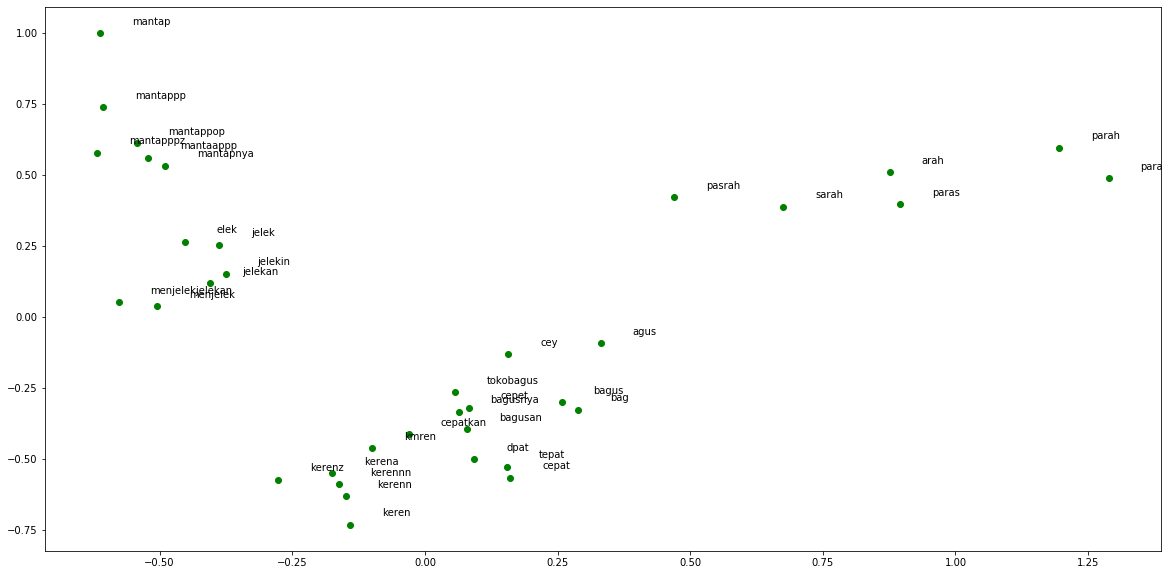

In [18]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = loaded_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 10))
plt.scatter(P[:, 0], P[:, 1], c='green', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')